In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import cv2

def load_and_normalize_images(base_folder_path, class_labels, image_size=(64, 64)):
    all_sequences = []
    all_labels = []

    for class_folder, label in class_labels.items():
        class_path = os.path.join(base_folder_path, class_folder)

        sequence_folders = [f for f in os.listdir(class_path) if os.path.isdir(os.path.join(class_path, f))]

        for sequence_folder in sequence_folders:
            sequence_path = os.path.join(class_path, sequence_folder)

            file_names = os.listdir(sequence_path)
            sorted_files = sorted(file_names, key=lambda x: int(os.path.splitext(x)[0]))

            images = []

            for file_name in sorted_files:
                file_path = os.path.join(sequence_path, file_name)
                image = cv2.imread(file_path)
                image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
                image_array = np.array(image) / 255.0  # Normalizar
                images.append(image_array)
            images = np.array(images) 
            all_sequences.append(images)
            all_labels.append(label)

    all_sequences = np.array(all_sequences)  
    all_labels = np.array(all_labels)  
    
    return all_sequences, all_labels

def display_sequences(sequences, num_sequences_to_show=5):
    for sequence in sequences[:num_sequences_to_show]:
        fig, axes = plt.subplots(1, len(sequence), figsize=(20, 20))
        for i, image in enumerate(sequence):
            if len(sequence) == 1:
                ax = axes
            else:
                ax = axes[i]
            ax.imshow(image)
            ax.axis('off')
        plt.show()

# Configuración inicial
class_labels = {
    "neutral": 0,
    "frustration": 1
    #
}



(712, 30, 64, 64)
(712,)


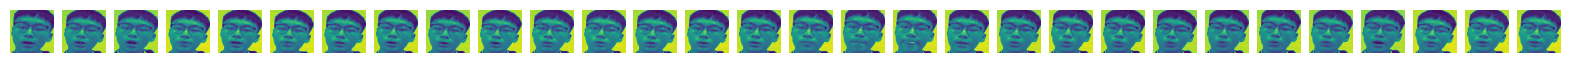

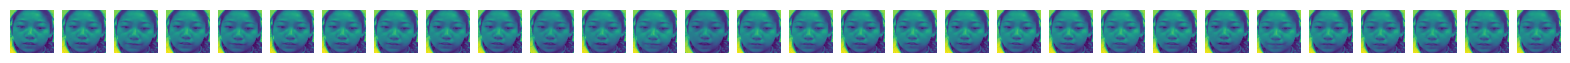

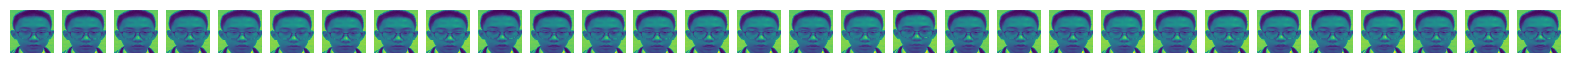

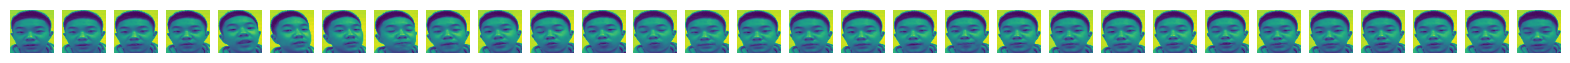

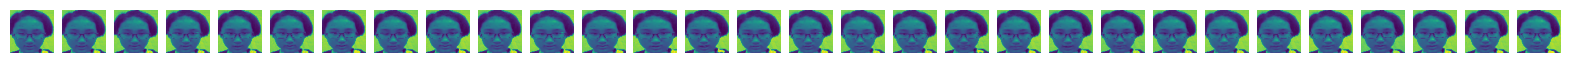

In [3]:
X_train, y_train = load_and_normalize_images('low_data/train'  , class_labels)
print(X_train.shape)
print(y_train.shape)
X_train, y_train = shuffle(X_train, y_train, random_state=42)
# Mostrar solo las primeras 5 secuencias
display_sequences(X_train, num_sequences_to_show=5)


(133, 30, 64, 64)
(133,)


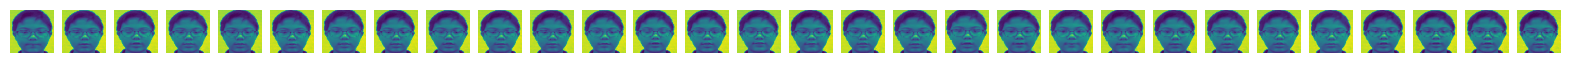

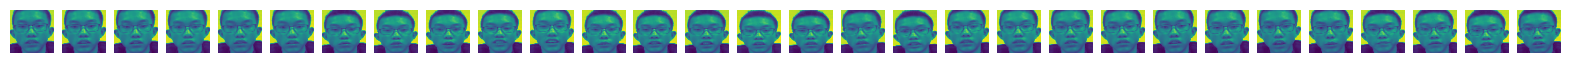

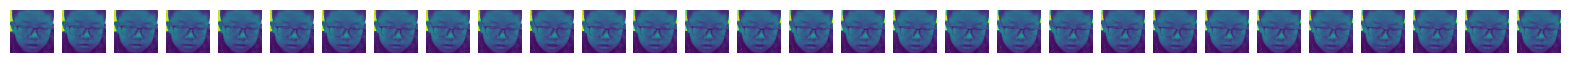

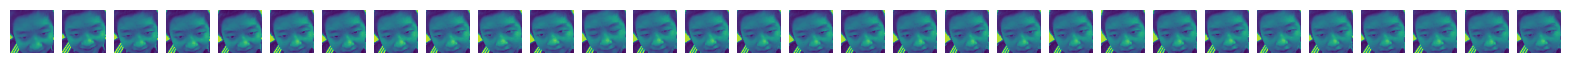

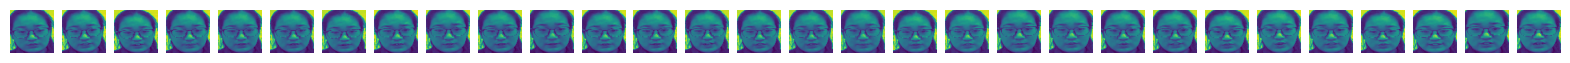

In [4]:
X_test, y_test = load_and_normalize_images('low_data/test' , class_labels)
X_test, y_test = shuffle(X_test, y_test, random_state=42)
print(X_test.shape)
print(y_test.shape)

display_sequences(X_test, num_sequences_to_show=5)

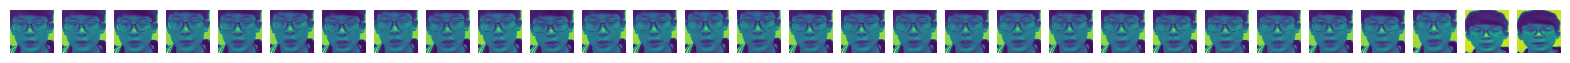

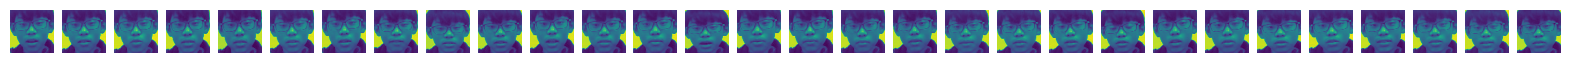

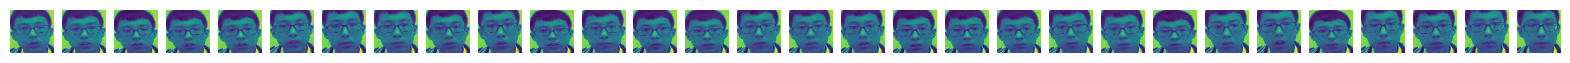

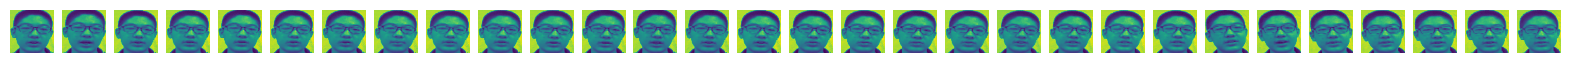

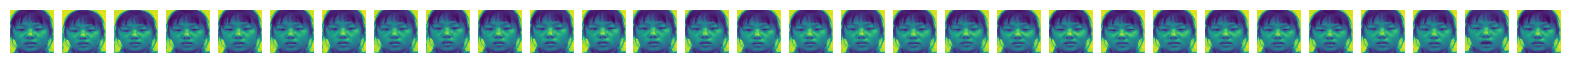

(132, 30, 64, 64)
(132,)


In [5]:
X_val, y_val = load_and_normalize_images('low_data/dev', class_labels)
X_val, y_val = shuffle(X_val, y_val, random_state=42)

display_sequences(X_val, num_sequences_to_show=5)
print(X_val.shape)
print(y_val.shape)

In [7]:
X_val

array([[[[0.1254902 , 0.11372549, 0.10196078, ..., 0.17254902,
          0.2       , 0.6       ],
         [0.11764706, 0.10588235, 0.10196078, ..., 0.1372549 ,
          0.22745098, 0.45882353],
         [0.11764706, 0.10980392, 0.10588235, ..., 0.14509804,
          0.2       , 0.48235294],
         ...,
         [0.17254902, 0.58823529, 0.82745098, ..., 0.0627451 ,
          0.0627451 , 0.05882353],
         [0.17254902, 0.81960784, 0.86666667, ..., 0.07058824,
          0.05882353, 0.05490196],
         [0.54901961, 0.81568627, 0.85882353, ..., 0.0627451 ,
          0.06666667, 0.05098039]],

        [[0.12156863, 0.11764706, 0.11372549, ..., 0.14117647,
          0.2       , 0.6       ],
         [0.12156863, 0.11372549, 0.11372549, ..., 0.15686275,
          0.20392157, 0.52941176],
         [0.12156863, 0.11372549, 0.10980392, ..., 0.15294118,
          0.17647059, 0.5254902 ],
         ...,
         [0.25882353, 0.44313725, 0.81960784, ..., 0.05882353,
          0.03921569, 0.0

In [6]:
height = 64
width = 64
channels = 3
sequence_length = 30

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, TimeDistributed,Dropout,BatchNormalization,LSTM,Dense

model = Sequential()
model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=(None,64, 64, 1)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))

model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Dropout(0.2))) 

model.add(TimeDistributed(Conv2D(128, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Dropout(0.2))) 

model.add(TimeDistributed(Flatten()))

model.add(LSTM(100,return_sequences=False))
model.add(Dense(2,activation="softmax"))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_11 (TimeDi  (None, None, 62, 62, 32)  320      
 stributed)                                                      
                                                                 
 time_distributed_12 (TimeDi  (None, None, 31, 31, 32)  0        
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, None, 29, 29, 64)  18496    
 stributed)                                                      
                                                                 
 time_distributed_14 (TimeDi  (None, None, 29, 29, 64)  256      
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, None, 14, 14, 64)

In [16]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [17]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

In [18]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [19]:
from keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_val_categorical = to_categorical(y_val)

In [20]:
history = model.fit(X_train, y_train_categorical, epochs=20, batch_size=32, validation_data=(X_val, y_val_categorical),callbacks=[early_stopping, reduce_lr])

Epoch 1/20


c:\Users\bl4ck\miniconda3\envs\tensorflow_cuda\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


23/23 [==============================] - 62s 3s/step - loss: 0.6747 - accuracy: 0.6643 - val_loss: 0.6405 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 2/20
23/23 [==============================] - 60s 3s/step - loss: 0.4677 - accuracy: 0.8034 - val_loss: 0.3581 - val_accuracy: 0.8939 - lr: 0.0010
Epoch 3/20
23/23 [==============================] - 60s 3s/step - loss: 0.3386 - accuracy: 0.9157 - val_loss: 0.4431 - val_accuracy: 0.8939 - lr: 0.0010
Epoch 4/20
23/23 [==============================] - 59s 3s/step - loss: 0.2256 - accuracy: 0.9480 - val_loss: 0.4848 - val_accuracy: 0.8939 - lr: 0.0010
Epoch 5/20
23/23 [==============================] - 59s 3s/step - loss: 0.1692 - accuracy: 0.9677 - val_loss: 0.5488 - val_accuracy: 0.8939 - lr: 0.0010
Epoch 6/20
23/23 [==============================] - 61s 3s/step - loss: 0.0919 - accuracy: 0.9874 - val_loss: 0.5856 - val_accuracy: 0.8939 - lr: 0.0010


In [21]:
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print(f'Accuracy: {accuracy*100:.2f}%')

5/5 [==============================] - 3s 587ms/step - loss: 0.3554 - accuracy: 0.8947
Accuracy: 89.47%


In [22]:
predictions = model.predict(X_test)
predictions

5/5 [==============================] - 3s 579ms/step


array([[0.95253575, 0.0474643 ],
       [0.9332593 , 0.06674065],
       [0.9688138 , 0.03118623],
       [0.95618   , 0.04382003],
       [0.9525813 , 0.04741877],
       [0.9533444 , 0.0466556 ],
       [0.9304653 , 0.06953467],
       [0.9517548 , 0.04824519],
       [0.96294546, 0.03705455],
       [0.94882745, 0.05117263],
       [0.9567908 , 0.04320918],
       [0.9670445 , 0.03295553],
       [0.9565359 , 0.04346417],
       [0.9500696 , 0.04993039],
       [0.93777305, 0.06222693],
       [0.95540404, 0.04459595],
       [0.9441124 , 0.05588753],
       [0.96560395, 0.03439604],
       [0.9329202 , 0.06707978],
       [0.94403434, 0.05596566],
       [0.9624155 , 0.03758449],
       [0.9517515 , 0.04824852],
       [0.95417345, 0.04582655],
       [0.93276846, 0.06723155],
       [0.9426506 , 0.05734937],
       [0.9521743 , 0.04782566],
       [0.93408227, 0.06591779],
       [0.93403244, 0.06596752],
       [0.9590355 , 0.04096444],
       [0.95780975, 0.04219024],
       [0.

In [23]:
predicted_labels = np.argmax(predictions, axis=1)

In [24]:
predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [25]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
for i in range(132):
    print(f"Muestra {i+1}:")
    print("Predicción:", predicted_labels[i], "(", predictions[i][predicted_labels[i]], ")")
    print("Etiqueta real:", y_val[i])
    print()

Muestra 1:
Predicción: 0 ( 0.9999865 )
Etiqueta real: 0

Muestra 2:
Predicción: 0 ( 0.99993527 )
Etiqueta real: 0

Muestra 3:
Predicción: 0 ( 0.9999722 )
Etiqueta real: 0

Muestra 4:
Predicción: 0 ( 0.8833957 )
Etiqueta real: 0

Muestra 5:
Predicción: 0 ( 0.9998909 )
Etiqueta real: 0

Muestra 6:
Predicción: 0 ( 0.9999794 )
Etiqueta real: 0

Muestra 7:
Predicción: 1 ( 0.9896814 )
Etiqueta real: 0

Muestra 8:
Predicción: 0 ( 0.99992526 )
Etiqueta real: 1

Muestra 9:
Predicción: 0 ( 0.99998033 )
Etiqueta real: 0

Muestra 10:
Predicción: 0 ( 0.99990106 )
Etiqueta real: 0

Muestra 11:
Predicción: 0 ( 0.99998987 )
Etiqueta real: 0

Muestra 12:
Predicción: 0 ( 0.9992138 )
Etiqueta real: 0

Muestra 13:
Predicción: 0 ( 0.99999964 )
Etiqueta real: 0

Muestra 14:
Predicción: 0 ( 0.9999156 )
Etiqueta real: 0

Muestra 15:
Predicción: 0 ( 0.99995995 )
Etiqueta real: 0

Muestra 16:
Predicción: 0 ( 0.9994642 )
Etiqueta real: 0

Muestra 17:
Predicción: 0 ( 0.86090904 )
Etiqueta real: 0

Muestra 18:
Pre

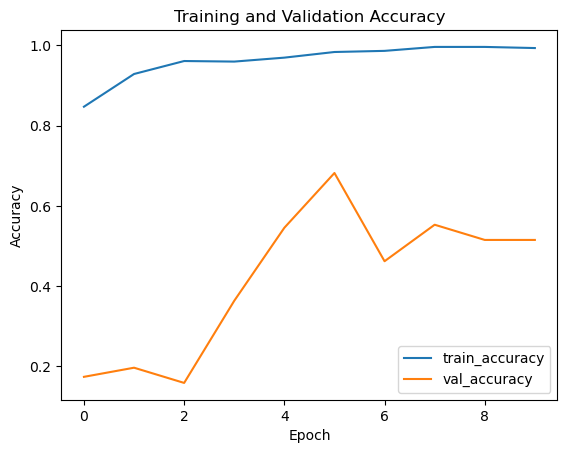

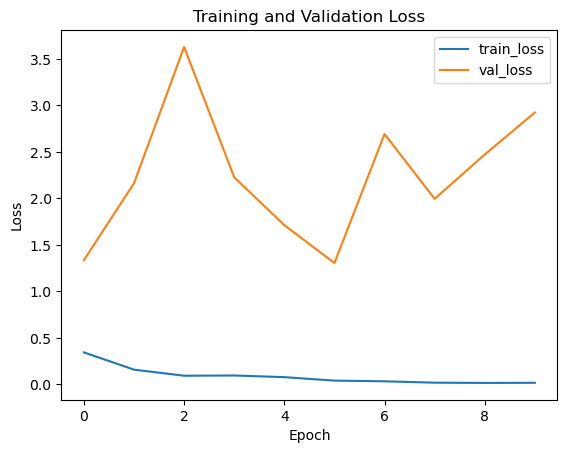

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

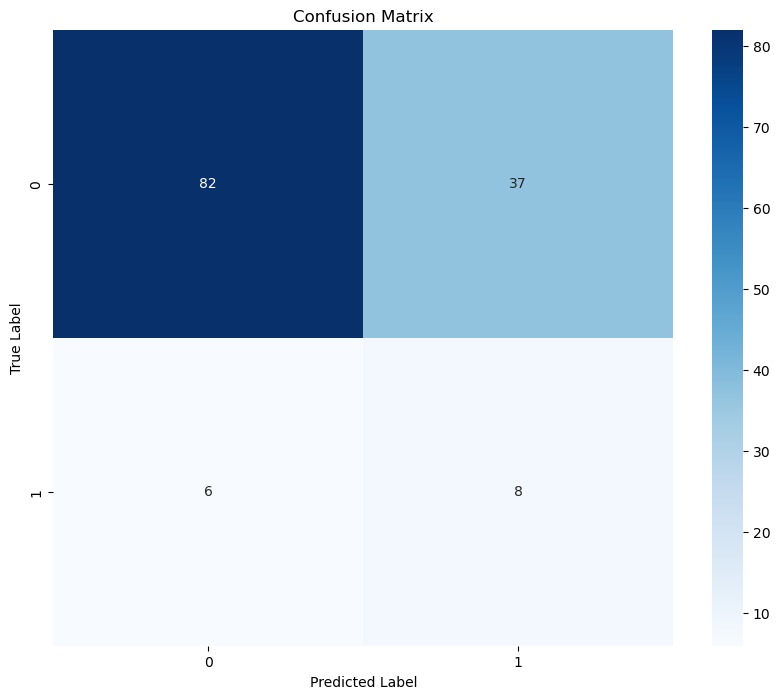

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predicted_labels)


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
